In [2]:
from lale.lib.sklearn import (
    PCA,
    LogisticRegression,
    KNeighborsClassifier as Kn,
    DecisionTreeClassifier as tree,
    SVC,
    RandomForestClassifier as rf
    )
from lale.lib.xgboost import XGBClassifier as xgb

from lale.lib.lale import NoOp, ConcatFeatures

In [3]:
import lale
import lale.helpers
from lale.lib.lale import Hyperopt
lale.wrap_imported_operators()

In [6]:
# Choose a loss function to optimize 
import sklearn.metrics
loss_function_options = sorted(sklearn.metrics.SCORERS.keys())

In [19]:
encoded_df = pd.read_csv('encoded_df.csv')
dependent_var = pd.read_csv('dependent_var')

In [21]:
train_len = int(0.8*41188)
train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

In [22]:
train_x.head()

,Unnamed: 0,job,marital,education,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,3,1,0,1,6,261,0,26,0,1,8,18,16,287,8
1,1,7,1,3,1,6,149,0,26,0,1,8,18,16,287,8
2,2,7,1,3,1,6,226,0,26,0,1,8,18,16,287,8
3,3,0,1,1,1,6,151,0,26,0,1,8,18,16,287,8
4,4,7,1,3,1,6,307,0,26,0,1,8,18,16,287,8


In [23]:
explainable_pipe = lale.operators.make_union(PCA, NoOp) >> (LogisticRegression | Kn | tree)

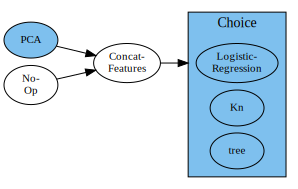

In [24]:
explainable_pipe.visualize()

In [17]:
explainable_train = explainable_pipe.auto_configure(train_x, train_y, optimizer=Hyperopt, cv=3,
                                                    max_evals=3, scoring='accuracy')

100%|██████████| 3/3 [00:00<00:00, 12.27trial/s, best loss=?]


ValueError: Error from hyperopt, none of the trials succeeded.